# Classification Modelling And Regression Analysis Project

### This project is aimed at data analysis and prediction modelling of a strain test metallurgical experiment on various grades of steel with different compositions for each avrying grade then performing regression analysis and predicting the regression model fitting the TCL strain test value 

### The second part of the project emphasises on the classification modelling of the statistical data suurvey done on the different species of penguinsin the different cluster of islands in the antarctic 

## loading and Visualizing the Dataset

### Loading of the metallurgical strain test data and visualizing the different aspects of the compositional parameters of the grades of steel and mainly focussing on the percentage compositions of Carbon,Silicon,Manganese,Phosphorus and Sulphur and then regulating the strain perdicting the TCL variable

In [355]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  #split the test set 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm

import pingouin as pg

In [356]:
df_experiment =pd.read_csv("Book1.csv")

In [357]:
df_experiment.head(5)


,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.5
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.1
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.9
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.7
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.5


In [358]:
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No.     487 non-null    int64  
 1   C       487 non-null    float64
 2   Si      487 non-null    float64
 3   Mn      487 non-null    float64
 4   P       487 non-null    float64
 5   S       487 non-null    float64
 6   Cr      487 non-null    float64
 7   Ni      487 non-null    float64
 8   Mo      487 non-null    float64
 9   N       487 non-null    float64
 10  Nb      487 non-null    float64
 11  Co      487 non-null    float64
 12  Cu      487 non-null    float64
 13  Al      487 non-null    float64
 14  Ti      487 non-null    float64
 15  V       487 non-null    float64
 16  B       487 non-null    float64
 17  Th      487 non-null    float64
 18  I       487 non-null    int64  
 19  U       487 non-null    float64
 20  Ve      487 non-null    float64
 21  Strain  487 non-null    float64
 22  TC

In [359]:
df_experiment.isnull().sum()  #looks for NaN

No.       0
C         0
Si        0
Mn        0
P         0
S         0
Cr        0
Ni        0
Mo        0
N         0
Nb        0
Co        0
Cu        0
Al        0
Ti        0
V         0
B         0
Th        0
I         0
U         0
Ve        0
Strain    0
TCL       0
dtype: int64

### The check is made to ensure that there is no garbage null value in the dataset of the specimens

In [360]:
df_experiment.describe()  #look for the scale

,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,244.000000,0.061951,0.627844,1.510893,0.019168,0.007691,19.112074,14.687187,0.924189,0.052364,...,0.074885,0.113185,0.048747,0.000515,5.840955,147.186858,13.712526,2.669425,2.031930,3.845955
std,140.729054,0.084147,0.662246,1.235992,0.009974,0.006582,3.276513,8.155322,1.115059,0.061406,...,0.162976,0.193230,0.172598,0.001669,3.453002,81.701882,2.258616,1.151274,1.406767,4.188706
min,1.000000,0.001000,0.010000,0.005000,0.001000,0.001000,12.630000,0.130000,0.000000,0.002000,...,0.002000,0.000000,0.000000,0.000000,3.000000,50.000000,8.000000,1.250000,0.000000,0.000000
25%,122.500000,0.020000,0.260000,0.930000,0.009500,0.003000,17.000000,9.650000,0.000000,0.019000,...,0.020000,0.000000,0.000000,0.000000,3.180000,100.000000,12.000000,1.670000,1.000000,0.410000
50%,244.000000,0.050000,0.500000,1.430000,0.021000,0.005000,18.320000,12.030000,0.190000,0.030000,...,0.020000,0.000000,0.000000,0.000000,5.000000,100.000000,13.000000,2.530000,2.000000,2.500000
75%,365.500000,0.061000,0.640000,1.700000,0.026000,0.012000,21.600000,16.870000,2.150000,0.060000,...,0.023000,0.250000,0.000000,0.000000,6.400000,180.000000,16.000000,4.000000,3.200000,6.005000
max,487.000000,0.470000,3.910000,8.360000,0.046000,0.032000,26.950000,33.950000,3.760000,0.368000,...,1.080000,1.060000,0.840000,0.011400,12.700000,330.000000,17.000000,4.450000,5.000000,19.300000


### above shows the statistical variations within the compostions of the various samples as well as the values of strain and the TCL values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='TCL', ylabel='Density'>

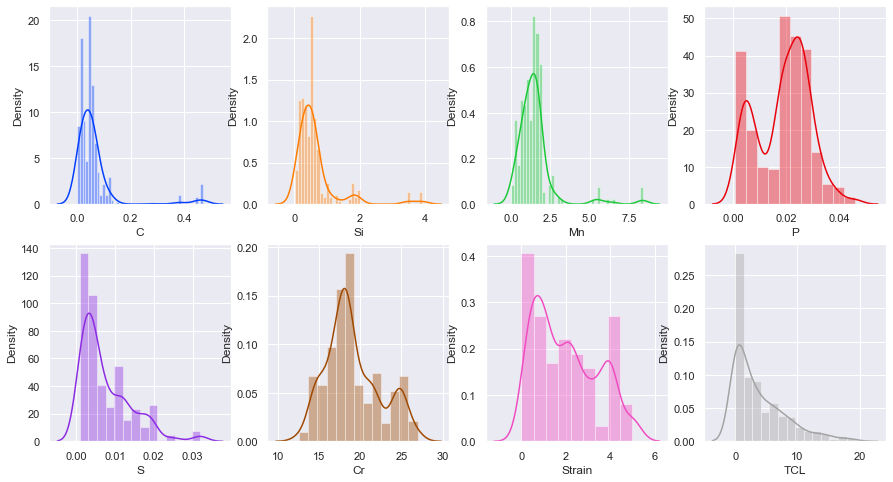

In [361]:
sns.set(color_codes=True)  #set colors
colors=sns.color_palette("bright")

fig,axes =plt.subplots(2,4,figsize=(15,8))

sns.distplot(df_experiment["C"],color=colors[0],ax=axes[0,0])
sns.distplot(df_experiment["Si"],color=colors[1],ax=axes[0,1])
sns.distplot(df_experiment["Mn"],color=colors[2],ax=axes[0,2])
sns.distplot(df_experiment["P"],color=colors[3],ax=axes[0,3])
sns.distplot(df_experiment["S"],color=colors[4],ax=axes[1,0])
sns.distplot(df_experiment["Cr"],color=colors[5],ax=axes[1,1])
sns.distplot(df_experiment["Strain"],color=colors[6],ax=axes[1,2])
sns.distplot(df_experiment["TCL"],color=colors[7],ax=axes[1,3])



### The Statistical Distribution is left skewed for the Carbon,Silicon,Manganese and Sulphur . The distribution of the Phosphrus is bimodal and that of Chromium can be assumed to be within normal distribution. The distribution of the strain applied is skewed and same can be said for the TCl value

<AxesSubplot:ylabel='TCL'>

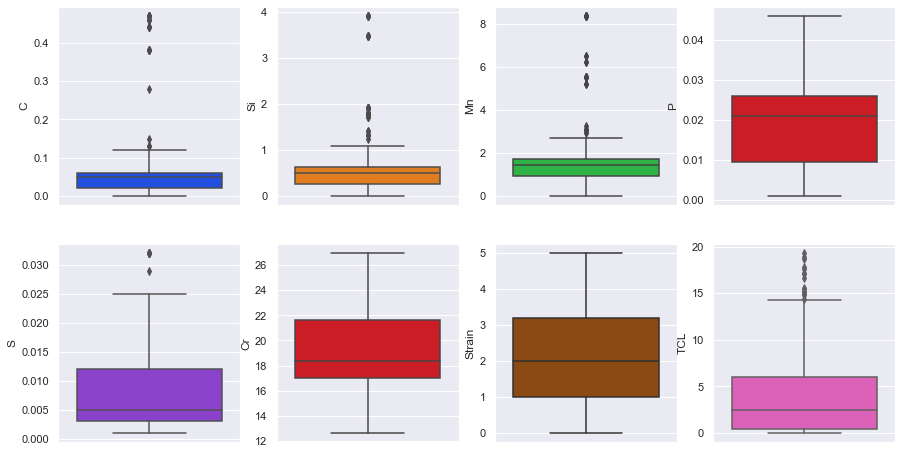

In [362]:
sns.set(color_codes=True)  #set colors
colors=sns.color_palette("bright")

fig,axes =plt.subplots(2,4,figsize=(15,8))

sns.boxplot(y=df_experiment["C"],color=colors[0],ax=axes[0,0])
sns.boxplot(y=df_experiment["Si"],color=colors[1],ax=axes[0,1])
sns.boxplot(y=df_experiment["Mn"],color=colors[2],ax=axes[0,2])
sns.boxplot(y=df_experiment["P"],color=colors[3],ax=axes[0,3])
sns.boxplot(y=df_experiment["S"],color=colors[4],ax=axes[1,0])
sns.boxplot(y=df_experiment["Cr"],color=colors[3],ax=axes[1,1])
sns.boxplot(y=df_experiment["Strain"],color=colors[5],ax=axes[1,2])
sns.boxplot(y=df_experiment["TCL"],color=colors[6],ax=axes[1,3])

### The boxplots are plotted to show the outliers within the dataset of the percentage compositions of the different specimens of the different grades of the steels. But the steels with the varying grades can not be necessarily casted out as outliers as the compositional; variations in steel can be justified within the metallurgical understanding an thus even if they are statistical outliers they cant be considered as logical outliers

## Cleaning and preparing the dataset

### After performing the visualization of our daatset it is very necessary to clean the garbage values and the outliers if any and prepare the final dataset for the regression analysis and also the model prediction

In [363]:
# strip data only when we can justify . logical outliers are omitted and not statistical outliers
#strip the 0 in the dimensions of diamonds


In [364]:
wierd_zeros=df_experiment[(df_experiment["C"]==0) | (df_experiment["Strain"]==0) | (df_experiment["TCL"]==0)]
wierd_zeros.shape


(82, 23)

In [365]:
wierd_zeros

,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
42,43,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,0.25,0.0
44,45,0.050,0.53,1.93,0.029,0.005,18.10,10.50,0.00,0.030,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,0.25,0.0
45,46,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,0.50,0.0
47,48,0.050,0.53,1.93,0.029,0.005,18.10,10.50,0.00,0.030,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,0.50,0.0
79,80,0.060,0.64,0.96,0.020,0.003,18.60,9.65,0.00,0.028,...,0.02,0.0,0.0,0.0,12.00,250,17.0,1.67,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,473,0.029,0.20,1.46,0.005,0.003,20.22,9.28,0.00,0.133,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,2.40,0.0
478,479,0.015,0.35,1.61,0.008,0.004,18.00,9.90,0.00,0.022,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.20,0.0
479,480,0.015,0.34,1.61,0.004,0.004,17.60,10.00,0.00,0.049,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.20,0.0
483,484,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.20,0.0


### the above representation shows the distrubutionsubset which has zero values. Here it is to be noted that the zero values are logically not wierd as the compostion of certain samples can have 0% of something which is normal. But for our main variables like C, Mn,Cr S and P there should not be any zero value present as the grades of steel are hoigh chromium and high manganese steel .Thus a zero value in these columns can be considered as a input mistake and can be discarded as garbage values

In [366]:
#get rid of wierd zeros#code to remove zeros

df_experimentX=df_experiment.copy()
df_experimentX=df_experimentX[~df_experimentX.isin(wierd_zeros)].dropna(how="all")
df_experimentX.shape

(405, 23)

### After eliminating the garbage values we have the cleaned dataset

In [367]:
!pip install fitter
from fitter import Fitter

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundoff error is d

,sumsquare_error,aic,bic,kl_div
chi,0.061180,727.320115,-3545.105892,inf
nakagami,0.061265,729.746098,-3544.542929,inf
gausshyper,0.061292,733.278278,-3526.354796,inf
beta,0.061552,723.995385,-3536.644013,inf
gamma,0.061903,727.563368,-3540.349863,inf


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


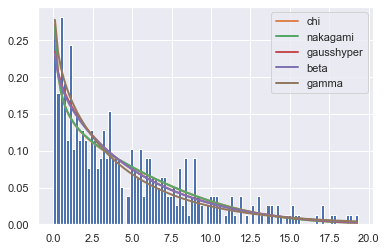

In [368]:
f=Fitter(data)
f.fit()
f.summary()

In [369]:
## resembles kind of a chi squared distribution

### The fitter function is called here to see the actual distribution of the TCL value parameter as that is whart we need to be predicting and from the distributional analysis it was quiet clear taht this is not a normal distribution

### From the fitter function it can be seen taht the distribution falls priomarily under the function of exponential Weibull disrtribution. But for some simplicity sake we can also consider thsi to be a exponpow or a chi distribution

### After cleqning our dataset it is time for us to actually split the data into the training and the testing set such that we can train the different models with the training data and test the models with the test data.It is to be noted that here no cross validation of the data is not performed but can easily be considered if we slpit the teraining testing and the cross validation data in a 70:20:10 ratio 

In [370]:
# now we split the data
#random state= something --exact same split every time
df= df_experimentX.copy()

train_df,test_df=train_test_split(df,test_size=0.3,random_state=32)

In [371]:
y_test=test_df["TCL"]

x_test=test_df.drop(columns=["TCL"],axis= 1)

y_train=train_df["TCL"]

x_train=train_df.drop(columns=["TCL"],axis= 1)


### After splitting the dataset into the training and the testing test then we create a evaluation function which will take into the true value of the TCL variable and the predicted value and gives the performance of the model by calculating the mean absolute error ,the mean squared error and the r2 score

In [372]:
# evaluation function -- evaluates the prediction with the actual values

def error_matrics(y_true,y_pred):
    mean_abs="Mean_absolute_error: {}".format(mean_absolute_error(y_true,y_pred))
    mean_squared="Mean_squared_error: {}".format(mean_squared_error(y_true,y_pred))
    r_2="r2 score: {}".format(r2_score(y_true,y_pred))
    return mean_abs,mean_squared,r_2
    

### Now we will put the traioning set values into the different regression models and testing the nodels with the evaluation function

### Linear Regression Model

In [373]:
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)
print (linear_regression.intercept_)
print(linear_regression.coef_)

-2.7968742533750808
[-1.27001618e-03  2.76092946e+00  3.02488107e+00 -1.52771741e+00
  8.60165176e+01 -5.45179028e+01 -6.12776350e-02  3.48303879e-01
  7.08594402e-02  6.60831014e+00 -3.58608518e-01 -1.47700448e+01
  6.50171030e-01 -1.23072700e+00  7.73915197e-01  4.20589466e+00
  9.80992922e+01 -4.94566764e-01  2.01724801e-02  6.12422671e-02
 -6.76323780e-01  1.27273839e+00]


In [374]:
y_pred_linear=linear_regression.predict(x_test)
y_pred_linear

array([ 4.25861563e+00,  8.89863674e+00,  3.49636766e+00,  6.82422710e+00,
        1.31356560e+00,  4.84635688e+00,  6.20533339e+00,  1.16370226e+00,
        3.12385005e+00,  6.06858953e+00,  3.47207789e+00,  7.88328070e+00,
        2.66930089e+00,  3.23226160e+00,  2.79736892e+00,  3.42716178e+00,
        1.07910325e+01,  6.77093763e+00,  1.47703692e+00,  3.71993020e+00,
        8.83478386e+00,  6.28319270e+00,  3.36045911e+00,  7.68532241e+00,
        5.62126510e+00,  4.07268563e+00,  1.12315988e+00,  4.06734103e+00,
        1.02408349e+01,  5.35189942e+00, -6.40040852e+00,  1.43515070e+00,
        2.93941081e+00,  4.79273553e+00,  4.21507594e+00,  3.79208852e+00,
        2.59850105e+00,  6.33856801e+00,  5.81997607e+00,  9.60557311e+00,
        2.65155668e+00, -5.25113392e+00,  3.17773890e+00,  2.20314955e+00,
       -2.73501903e-01,  2.61649208e+00,  5.38654752e+00,  1.54212893e+00,
        3.59849038e+00,  1.62686244e+00,  2.28382636e+00,  1.14972431e+00,
        1.03859238e+00, -

In [375]:
linear_comparison=pd.DataFrame({"actual values":y_test,"predicted values":y_pred_linear})
linear_comparison

,actual values,predicted values
163,4.91,4.258616
202,10.33,8.898637
170,5.59,3.496368
283,0.79,6.824227
39,4.40,1.313566
...,...,...
330,4.10,7.327428
3,3.70,5.838172
443,0.53,4.167956
67,7.01,4.867419


In [376]:
#check accuracy

error_matrics(y_test,y_pred_linear)

('Mean_absolute_error: 2.643665941070181',
 'Mean_squared_error: 11.556873664195269',
 'r2 score: 0.21919953704167827')

### We can see that the linear regression model dosent actually perform very good in predicting the TCL value taking in the values of the training set. It gives a r2 score value of 0.219 that is round about 22% of prediction efficiency

In [377]:
#check accuracy -- otehr way

linear_comparison["diff"]=np.abs(linear_comparison["actual values"]-linear_comparison["predicted values"])
linear_comparison.head(6)

,actual values,predicted values,diff
163,4.91,4.258616,0.651384
202,10.33,8.898637,1.431363
170,5.59,3.496368,2.093632
283,0.79,6.824227,6.034227
39,4.40,1.313566,3.086434
119,1.12,4.846357,3.726357


In [378]:
linear_comparison["diffmax_0.5"]=["yes" if x<=0.5 else "no" for x in linear_comparison["diff"]]

linear_comparison["diffmax_1"]=["yes" if x<=1 else "no" for x in linear_comparison["diff"]]

linear_comparison

,actual values,predicted values,diff,diffmax_0.5,diffmax_1
163,4.91,4.258616,0.651384,no,yes
202,10.33,8.898637,1.431363,no,no
170,5.59,3.496368,2.093632,no,no
283,0.79,6.824227,6.034227,no,no
39,4.40,1.313566,3.086434,no,no
...,...,...,...,...,...
330,4.10,7.327428,3.227428,no,no
3,3.70,5.838172,2.138172,no,no
443,0.53,4.167956,3.637956,no,no
67,7.01,4.867419,2.142581,no,no


In [379]:
linear_comparison["diffmax_0.5"].value_counts()

no     108
yes     14
Name: diffmax_0.5, dtype: int64

In [380]:
# accuracy
14/linear_comparison.count()

#accuracy of about 11% --very bad

actual values       0.114754
predicted values    0.114754
diff                0.114754
diffmax_0.5         0.114754
diffmax_1           0.114754
dtype: float64

In [381]:
linear_comparison["diffmax_1"].value_counts()

no     92
yes    30
Name: diffmax_1, dtype: int64

In [382]:
# accuracy
30/linear_comparison.count()

#accuracy of about 24% --very bad

actual values       0.245902
predicted values    0.245902
diff                0.245902
diffmax_0.5         0.245902
diffmax_1           0.245902
dtype: float64

### We can see that the linear regression model dosent actually perform very good in predicting the TCL value taking in the values of the training set. It gives a r2 score value of 0.245 that is round about 24% of prediction efficiency

In [383]:
# statsmodels version--linear regression

model_linear=sm.OLS(y_train,x_train)
linear_statsmodel= model_linear.fit()

print(linear_statsmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                    TCL   R-squared (uncentered):                   0.777
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              41.44
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                    3.45e-72
Time:                        12:00:48   Log-Likelihood:                         -714.21
No. Observations:                 283   AIC:                                      1472.
Df Residuals:                     261   BIC:                                      1553.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Ridge Regression

In [384]:
# alpha is the regularixzation 
#we also have cross validation built in

#common alpha for ridge 
alphas=[.01,.1,1,10,100,1000,10000]


In [385]:
ridge=RidgeCV(alphas=alphas,cv=5)
ridge_fit=ridge.fit(x_train,y_train)

In [386]:
yhat_ridge=ridge_fit.predict(x_test)
error_matrics(y_test,yhat_ridge)

('Mean_absolute_error: 2.6253181195529915',
 'Mean_squared_error: 11.584380134941656',
 'r2 score: 0.2173411568501853')

### We can see that the ridge regression model dosent actually perform very good in predicting the TCL value taking in the values of the training set. It gives a r2 score value of 0.219 that is round about 22% of prediction efficiency ,pretty much same with the linear regression

### lasso regression --least absolute shrinkage in singular operator

In [387]:
lasso=LassoCV(cv=5,random_state=32,alphas=alphas)
lasso_fit=lasso.fit(x_train,y_train)

In [388]:
yhat_lasso=lasso_fit.predict(x_test)
error_matrics(y_test,yhat_lasso)

('Mean_absolute_error: 2.567047193154057',
 'Mean_squared_error: 11.447796960360781',
 'r2 score: 0.22656892977942134')

In [389]:
yhat_ridge=ridge_fit.predict(x_test)
error_matrics(y_test,yhat_ridge)

('Mean_absolute_error: 2.6253181195529915',
 'Mean_squared_error: 11.584380134941656',
 'r2 score: 0.2173411568501853')

### We can see that the Lasso regression model dosent actually perform very good in predicting the TCL value taking in the values of the training set. It gives a r2 score value of 0.217that is round about 22% of prediction efficiency

In [390]:
#comparison
lasso_ridge_comp=pd.DataFrame({"actual":y_test,"lasso pred":yhat_lasso,"ridge pred":yhat_ridge})

lasso_ridge_comp

,actual,lasso pred,ridge pred
163,4.91,4.510389,4.096894
202,10.33,8.635382,8.755459
170,5.59,2.199926,2.793881
283,0.79,5.712481,6.743646
39,4.40,3.061514,1.896268
...,...,...,...
330,4.10,7.026259,7.342640
3,3.70,5.330121,5.795250
443,0.53,5.958755,4.716050
67,7.01,4.199122,4.949243


### we check the frequency of the difference in the true value and the predicted value for some measures of error . The error measured is absolute error.We check for the absolute error of 0.5 and 1 in the prediction of the TCL values and check the frequency of yes and no

In [391]:
lasso_ridge_comp["diff"]=np.abs(lasso_ridge_comp["lasso pred"]-lasso_ridge_comp["ridge pred"])

lasso_ridge_comp["diffmax_0.5"]=["yes" if x<=0.5 else "no" for x in lasso_ridge_comp["diff"]]

lasso_ridge_comp["diffmax_1"]=["yes" if x<=1 else "no" for x in lasso_ridge_comp["diff"]]

lasso_ridge_comp

,actual,lasso pred,ridge pred,diff,diffmax_0.5,diffmax_1
163,4.91,4.510389,4.096894,0.413495,yes,yes
202,10.33,8.635382,8.755459,0.120078,yes,yes
170,5.59,2.199926,2.793881,0.593956,no,yes
283,0.79,5.712481,6.743646,1.031165,no,no
39,4.40,3.061514,1.896268,1.165246,no,no
...,...,...,...,...,...,...
330,4.10,7.026259,7.342640,0.316381,yes,yes
3,3.70,5.330121,5.795250,0.465130,yes,yes
443,0.53,5.958755,4.716050,1.242705,no,no
67,7.01,4.199122,4.949243,0.750121,no,yes


In [392]:
lasso_ridge_comp["diffmax_0.5"].value_counts()

yes    70
no     52
Name: diffmax_0.5, dtype: int64

### Gives about 58.3% of efficient prediction with 0.5 absolute error to be considered

### Then we check the diffrence in the predicted values of the ridge regression and the lasso regression and check the difference in the values

In [393]:
lasso_ridge_comp.describe()

,actual,lasso pred,ridge pred,diff
count,122.000000,122.000000,122.000000,122.000000
mean,4.378852,4.055524,4.033979,0.505245
std,3.863113,3.310679,3.445794,0.368838
min,0.010000,-5.147384,-6.085315,0.006274
25%,1.257500,2.359634,1.961956,0.234373
50%,3.555000,3.537807,3.644061,0.446676
75%,6.055000,6.129542,6.270049,0.711230
max,18.850000,12.075910,12.317542,1.918064


### we can see that in average there is not muich of a difference in the prection values of both the models

### ElasticNet regression

In [394]:
elasticnet=ElasticNetCV(cv=5,random_state=32,l1_ratio=0.7,alphas=alphas)
elastic_fit=elasticnet.fit(x_train,y_train)

In [395]:
yhat_elasticnet=elastic_fit.predict(x_test)
error_matrics(y_test,yhat_elasticnet)

('Mean_absolute_error: 2.5787513030779503',
 'Mean_squared_error: 11.510812935985154',
 'r2 score: 0.22231147189150513')

### We can see that the elasticnet regression model dosent actually perform very good in predicting the TCL value taking in the values of the training set. It gives a r2 score value of 0.219 that is round about 22% of prediction efficiency

#### l1 ratio is directly related to l2 ratio and changing these we can use the ridge and lasso proportionally

### Random Forest Regression

In [396]:
rf=RandomForestRegressor(n_estimators=100,random_state=32)

In [397]:
rf_fit=rf.fit(x_train,y_train)

In [398]:
yhat_rf=rf_fit.predict(x_test)
error_matrics(y_test,yhat_rf)

('Mean_absolute_error: 1.6072229508196727',
 'Mean_squared_error: 5.692322185081972',
 'r2 score: 0.6154178087807786')

### We can see that the RF regression model actually perform very good in predicting the TCL value taking in the values of the training set. It gives a r2 score value of 0.615 that is round about 61.5% of prediction efficiency

In [399]:
# reducing estimators

rf=RandomForestRegressor(n_estimators=50,random_state=32)
rf_fit=rf.fit(x_train,y_train)
yhat_rf=rf_fit.predict(x_test)
error_matrics(y_test,yhat_rf)

('Mean_absolute_error: 1.6386934426229511',
 'Mean_squared_error: 5.695014358360657',
 'r2 score: 0.6152359213427534')

In [400]:
rf=RandomForestRegressor(n_estimators=10,random_state=32)
rf_fit=rf.fit(x_train,y_train)
yhat_rf=rf_fit.predict(x_test)
error_matrics(y_test,yhat_rf)

('Mean_absolute_error: 1.805188524590164',
 'Mean_squared_error: 6.653817631147541',
 'r2 score: 0.5504576723949155')

In [401]:
# increasing estimators
rf=RandomForestRegressor(n_estimators=1000,random_state=32)
rf_fit=rf.fit(x_train,y_train)
yhat_rf=rf_fit.predict(x_test)
error_matrics(y_test,yhat_rf)

('Mean_absolute_error: 1.5771256557377062',
 'Mean_squared_error: 5.5133445485893375',
 'r2 score: 0.6275098178736517')

In [402]:
# increasing estimators
rf=RandomForestRegressor(n_estimators=10000,random_state=32)
rf_fit=rf.fit(x_train,y_train)
yhat_rf=rf_fit.predict(x_test)
error_matrics(y_test,yhat_rf)

('Mean_absolute_error: 1.5787601721311941',
 'Mean_squared_error: 5.57626419855158',
 'r2 score: 0.6232588678981494')

### we try to check for the RF regression with varied values of the estimators and we come to a conclusion that the 1000 estimator value gives the higest prediction performace in the Rf regression model

### therefore incresing too much no of estimators can result in weaker predictions

## Model Compuatation

### Rename some things to make more representable& transfareble

In [403]:
features=x_train.copy()
targets=y_train.copy()

In [404]:
models=[ LinearRegression(),RidgeCV(),LassoCV(),ElasticNetCV(),RandomForestRegressor()]
CV=10
cv_df=pd.DataFrame(index=range(CV*len(models)))
entries=[]


In [405]:
### comparison of the different regression models is done to show which model predicts the best

In [406]:

for model in models:
    model_name=model.__class__.__name__
    accuracies=cross_val_score(model,features,targets,scoring="r2",cv=CV)
    for fold_idx,accuracy in enumerate(accuracies):
        entries.append((model_name,fold_idx,accuracy))
cv_df=pd.DataFrame(entries,columns=["model_name",'fold_idx','r2'])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

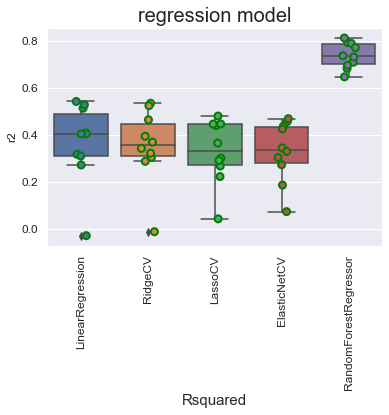

In [407]:
sns.boxplot(x="model_name",y="r2",data=cv_df)
sns.stripplot(x="model_name",y="r2",data=cv_df,size=7,jitter=True,edgecolor="green",linewidth=2)
plt.title("regression model",fontsize=20)
plt.xlabel("Rsquared",fontsize=15)

plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12,rotation=0)


### we can see in the comparitive performance pf the diffreent regression models that the random forest regressor has clearly out performed the rest of the regression models. It has a higer prediction value that is the r2 score and it also has the least bias. Thus we can say among the general models tried out the random forest regressor performs the best

In [408]:
cv_df.head(10)

,model_name,fold_idx,r2
0,LinearRegression,0,0.271465
1,LinearRegression,1,-0.030385
2,LinearRegression,2,0.542830
3,LinearRegression,3,0.513693
4,LinearRegression,4,0.317134
5,LinearRegression,5,0.408217
6,LinearRegression,6,0.528634
7,LinearRegression,7,0.404979
8,LinearRegression,8,0.404031
9,LinearRegression,9,0.309987


In [409]:
# make grouby--to dataframe

final_comp=cv_df.groupby("model_name").r2.mean().reset_index().sort_values(by="r2",ascending=False)

final_comp

,model_name,r2
3,RandomForestRegressor,0.738315
2,LinearRegression,0.367059
4,RidgeCV,0.353005
1,LassoCV,0.330067
0,ElasticNetCV,0.329580


### we can see in the comparitive performance pf the diffreent regression models that the random forest regressor has clearly out performed the rest of the regression models. It has a higer prediction value that is the r2 score and it also has the least bias. Thus we can say among the general models tried out the random forest regressor performs the best

### The RF regressor model predicts with an efficiency of 73% which is higher than the rest of the models which perform fairly poor in predicting the TCL value

## Model Hypertuning and Optimization

In [410]:
from sklearn.model_selection import GridSearchCV
#used for optimizaztion -- from lot of options

In [411]:
regressor=RandomForestRegressor(random_state=32)

In [412]:
#we have finalized the model =RandomForestRegressor as best model
#then we run this code--to optimize

grid={"n_estimators": [20,50,100,500],
      "criterion" :["mse","mae"]}

In [413]:
#time consuming
grid_apply=GridSearchCV(regressor,grid,scoring="r2",cv=3,refit=True,verbose=2)

In [414]:
#time consuming--runtime>30 mins--but worth it

grid_apply.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] criterion=mse, n_estimators=20 ..................................
[CV] ................... criterion=mse, n_estimators=20, total=   0.1s
[CV] criterion=mse, n_estimators=20 ..................................
[CV] ................... criterion=mse, n_estimators=20, total=   0.0s
[CV] criterion=mse, n_estimators=20 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... criterion=mse, n_estimators=20, total=   0.1s
[CV] criterion=mse, n_estimators=50 ..................................
[CV] ................... criterion=mse, n_estimators=50, total=   0.1s
[CV] criterion=mse, n_estimators=50 ..................................
[CV] ................... criterion=mse, n_estimators=50, total=   0.1s
[CV] criterion=mse, n_estimators=50 ..................................
[CV] ................... criterion=mse, n_estimators=50, total=   0.1s
[CV] criterion=mse, n_estimators=100 .................................
[CV] .................. criterion=mse, n_estimators=100, total=   0.2s
[CV] criterion=mse, n_estimators=100 .................................
[CV] .................. criterion=mse, n_estimators=100, total=   0.2s
[CV] criterion=mse, n_estimators=100 .................................
[CV] .................. criterion=mse, n_estimators=100, total=   0.2s
[CV] criterion=mse, n_estimators=500 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   15.5s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=32),
             param_grid={'criterion': ['mse', 'mae'],
                         'n_estimators': [20, 50, 100, 500]},
             scoring='r2', verbose=2)

In [415]:
#time consuming--runtime>30 mins

best_perf=grid_apply.best_score_
best_model=grid_apply.best_params_

print ("Best R Squared="+" "+str(best_perf))
print(" ")
print ("Best parameters="+" "+str(best_model))


Best R Squared= 0.7152048952105939
 
Best parameters= {'criterion': 'mse', 'n_estimators': 50}


### This shows that the mse criterion with the 50 estimator value in the RF regression gives the most optimized predictive value of the TCL variable



### Now loading the statistical data of the different species of the penguins in the antarctica region

### Loading of the metallurgical strain test data and visualizing the different aspects of the compositional parameters of the grades of steel and mainly focussing on the percentage compositions of Carbon,Silicon,Manganese,Phosphorus and Sulphur and then regulating the strain perdicting the TCL variable

In [416]:
df_experiment=sns.load_dataset("penguins")
df_experiment.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [417]:
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [418]:
df_experiment.describe()  #look for the scale

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [419]:
df_experiment.describe(include=["O"])


,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [420]:
df_experiment=df_experiment[df_experiment["sex"].notnull()]

In [421]:
df_experiment.describe(include=["O"])

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


In [422]:
df_experiment.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

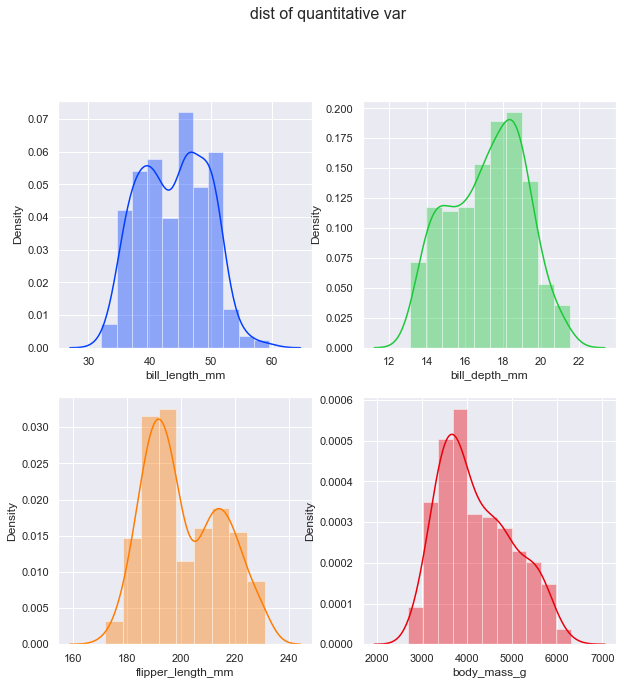

In [423]:
sns.set(color_codes=True)

fig,axes=plt.subplots(2,2,figsize=(10,10))

sns.distplot(df_experiment["bill_length_mm"],color=colors[0],ax=axes[0,0])
sns.distplot(df_experiment["bill_depth_mm"],color=colors[2],ax=axes[0,1])
sns.distplot(df_experiment["flipper_length_mm"],color=colors[1],ax=axes[1,0])
sns.distplot(df_experiment["body_mass_g"],color=colors[3],ax=axes[1,1])

plt.suptitle("dist of quantitative var",y=1.01,size=16)
plt.tight_layout
plt.show()

In [424]:
### The bill length and the flipper length shows a bimodal variation while the bill depth and body mass shows left and right skewed distributions

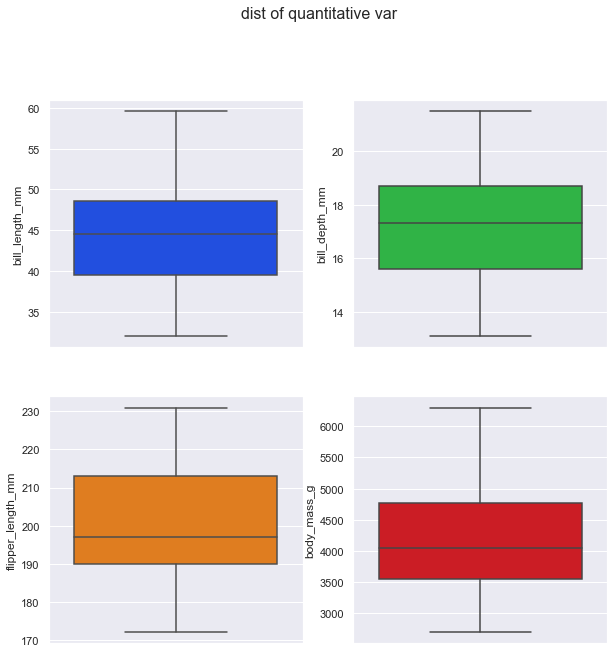

In [425]:
sns.set(color_codes=True)

fig,axes=plt.subplots(2,2,figsize=(10,10))

sns.boxplot(y=df_experiment["bill_length_mm"],color=colors[0],ax=axes[0,0])
sns.boxplot(y=df_experiment["bill_depth_mm"],color=colors[2],ax=axes[0,1])
sns.boxplot(y=df_experiment["flipper_length_mm"],color=colors[1],ax=axes[1,0])
sns.boxplot(y=df_experiment["body_mass_g"],color=colors[3],ax=axes[1,1])

plt.suptitle("dist of quantitative var",y=1.01,size=16)
plt.tight_layout
plt.show()

### No such outliers can be observed in the dataset observing the boxplots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


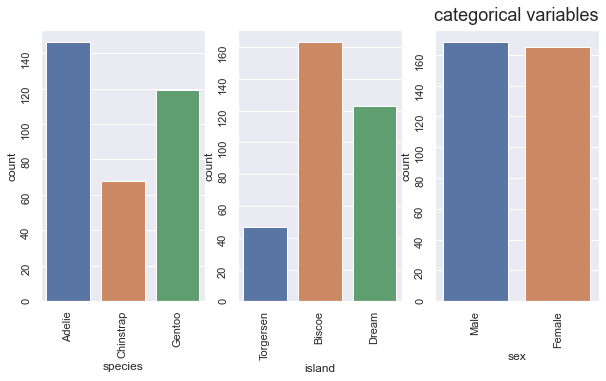

In [426]:
sns.set(color_codes=True)
colors=sns.color_palette("bright")
fig,axes=plt.subplots(1,3,figsize=(10,5))

sns.countplot("species",data=df_experiment, ax=axes[0])
sns.countplot("island",data=df_experiment, ax=axes[1])
sns.countplot("sex",data=df_experiment, ax=axes[2])

# quick for loop to adjust all axes at once
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    
plt.title("categorical variables",y=1.01,size=18)
plt.tight_layout
plt.show()

### The male and the female distributions show equal representations more or less so there is no large bias present in the dataset

### The island representations show so irregularities in the no of specimens and thus we are dropping the island coluimn and will be henceforth working with the species distribution

In [427]:
#male is same almnost in count as female ,thus well face no bias as such
#get rid of island column
df_experiment=df_experiment.drop(columns="island",axis=0)
df_experiment

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,Male
1,Adelie,39.5,17.4,186.0,3800.0,Female
2,Adelie,40.3,18.0,195.0,3250.0,Female
4,Adelie,36.7,19.3,193.0,3450.0,Female
5,Adelie,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,Female
340,Gentoo,46.8,14.3,215.0,4850.0,Female
341,Gentoo,50.4,15.7,222.0,5750.0,Male
342,Gentoo,45.2,14.8,212.0,5200.0,Female


In [428]:
df_experiment["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [429]:
adelie=df_experiment[df_experiment["species"]=="Adelie"].sample(n=50)
gentoo=df_experiment[df_experiment["species"]=="Gentoo"].sample(n=50)
chinstrap=df_experiment[df_experiment["species"]=="Chinstrap"].sample(n=50)

In [430]:
new_peng=pd.concat([adelie,gentoo,chinstrap],axis=0)
new_peng

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
60,Adelie,35.7,16.9,185.0,3150.0,Female
55,Adelie,41.4,18.6,191.0,3700.0,Male
79,Adelie,42.1,19.1,195.0,4000.0,Male
76,Adelie,40.9,16.8,191.0,3700.0,Female
15,Adelie,36.6,17.8,185.0,3700.0,Female
...,...,...,...,...,...,...
193,Chinstrap,46.2,17.5,187.0,3650.0,Female
211,Chinstrap,45.6,19.4,194.0,3525.0,Female
209,Chinstrap,49.3,19.9,203.0,4050.0,Male
207,Chinstrap,52.2,18.8,197.0,3450.0,Male


### We are converting the male anmd female species as 0 and 1 values so that we can model the distributions accordingly

In [431]:
peng_sex=pd.get_dummies(new_peng["sex"])
new_peng=new_peng.drop(columns="sex",axis=0)
final_df=pd.concat([new_peng,peng_sex],axis=1)
final_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Female,Male
60,Adelie,35.7,16.9,185.0,3150.0,1,0
55,Adelie,41.4,18.6,191.0,3700.0,0,1
79,Adelie,42.1,19.1,195.0,4000.0,0,1
76,Adelie,40.9,16.8,191.0,3700.0,1,0
15,Adelie,36.6,17.8,185.0,3700.0,1,0
...,...,...,...,...,...,...,...
193,Chinstrap,46.2,17.5,187.0,3650.0,1,0
211,Chinstrap,45.6,19.4,194.0,3525.0,1,0
209,Chinstrap,49.3,19.9,203.0,4050.0,0,1
207,Chinstrap,52.2,18.8,197.0,3450.0,0,1


### After cleqning our dataset it is time for us to actually split the data into the training and the testing set such that we can train the different models with the training data and test the models with the test data.It is to be noted that here no cross validation of the data is not performed but can easily be considered if we slpit the teraining testing and the cross validation data in a 70:20:10 ratio¶

In [432]:
# now we split the data
#random state= something --exact same split every time

train_df,test_df=train_test_split(final_df,test_size=0.5,random_state=32)

In [433]:
y_test=test_df["species"]

x_test=test_df.drop(columns=["species"],axis= 1)

y_train=train_df["species"]

x_train=train_df.drop(columns=["species"],axis= 1)

In [434]:
# binarize our categorical labels fr the species
final_df["spec_id"]=final_df["species"].factorize()[0]

#setting up the associated dictionary for the later usage with heat maps and confusion matrix
spec_id_df=final_df[["species","spec_id"]].drop_duplicates().sort_values("spec_id")
spec_id_df

,species,spec_id
60,Adelie,0
334,Gentoo,1
192,Chinstrap,2


## Hypothesis Testing

###  Naive bayes

In [435]:
from sklearn.naive_bayes import MultinomialNB
model_NB=MultinomialNB()
model_NB.fit(x_train,y_train)
y_pred_nb=model_NB.predict(x_test)
from sklearn.metrics import confusion_matrix
nb_confusion_matrix=confusion_matrix(y_test,y_pred_nb)
nb_confusion_matrix

array([[14,  8,  8],
       [ 1, 19,  4],
       [ 0,  0, 21]], dtype=int64)

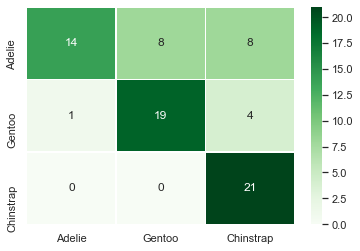

In [436]:
sns.set(color_codes=True)
sns.heatmap(nb_confusion_matrix,cmap="Greens",annot=True,linewidth=0.5,
           xticklabels=spec_id_df["species"].values,yticklabels=spec_id_df["species"].values)

plt.show()

In [437]:
 from sklearn.metrics import classification_report
print("classification report:naive bayes")
print(classification_report(y_test,y_pred_nb))

classification report:naive bayes
              precision    recall  f1-score   support

      Adelie       0.93      0.47      0.62        30
   Chinstrap       0.70      0.79      0.75        24
      Gentoo       0.64      1.00      0.78        21

    accuracy                           0.72        75
   macro avg       0.76      0.75      0.72        75
weighted avg       0.78      0.72      0.71        75



### The classification report of the naive bayes shows an f1 score of about 0.81 showing that the predicting efficiency is about 81%

### logistic regression

In [438]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression(multi_class="multinomial",max_iter=10000)
model_log.fit(x_train,y_train)
y_pred_log=model_log.predict(x_test)
log_confusion_matrix1=confusion_matrix(y_test,y_pred_log)
log_confusion_matrix1

array([[28,  2,  0],
       [ 0, 24,  0],
       [ 0,  0, 21]], dtype=int64)

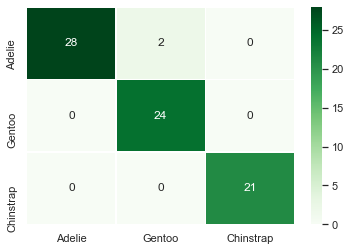

In [439]:
sns.set(color_codes=True)
sns.heatmap(log_confusion_matrix1,cmap="Greens",annot=True,linewidth=0.5,
           xticklabels=spec_id_df["species"].values,yticklabels=spec_id_df["species"].values)

plt.show()

In [440]:
 from sklearn.metrics import classification_report
print("classification report:logistic regression")
print(classification_report(y_test,y_pred_log))

classification report:logistic regression
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        30
   Chinstrap       0.92      1.00      0.96        24
      Gentoo       1.00      1.00      1.00        21

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.98        75
weighted avg       0.98      0.97      0.97        75



### The classification report of the naive bayes shows an f1 score of about 0.99 showing that the predicting efficiency is about 99%

### Thus the logistic regression model performs exceptionally well in predicting the species variation

### K-nearest neighbours

In [269]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier()
model_KNN.fit(x_train,y_train)

y_pred_KNN = model_KNN.predict(x_test)
KNN_confusion_matrix=confusion_matrix(y_test,y_pred_KNN)
KNN_confusion_matrix

array([[15,  9,  6],
       [ 8, 16,  0],
       [ 0,  0, 21]], dtype=int64)

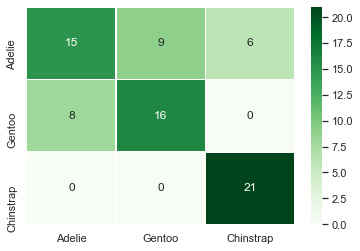

In [270]:
sns.set(color_codes=True)
sns.heatmap(KNN_confusion_matrix,cmap="Greens",annot=True,linewidth=0.5,
           xticklabels=spec_id_df["species"].values,yticklabels=spec_id_df["species"].values)

plt.show()

In [271]:
 from sklearn.metrics import classification_report
print("classification report:K-nearest neighbours")
print(classification_report(y_test,y_pred_KNN))

classification report:K-nearest neighbours
              precision    recall  f1-score   support

      Adelie       0.65      0.50      0.57        30
   Chinstrap       0.64      0.67      0.65        24
      Gentoo       0.78      1.00      0.88        21

    accuracy                           0.69        75
   macro avg       0.69      0.72      0.70        75
weighted avg       0.68      0.69      0.68        75



### The classification report of the naive bayes shows an f1 score of about 0.69showing that the predicting efficiency is about 69%

### Thus here the k Nearest neighbour algorithm shows the a comparetively poor prediction value

### SVM

In [272]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(x_train,y_train)

y_pred_SVC = model_SVC.predict(x_test)
SVM_confusion_matrix=confusion_matrix(y_test,y_pred_SVC)
SVM_confusion_matrix

array([[ 0, 28,  2],
       [ 0, 23,  1],
       [ 0,  2, 19]], dtype=int64)

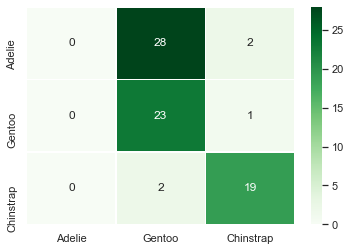

In [273]:
sns.set(color_codes=True)
sns.heatmap(SVM_confusion_matrix,cmap="Greens",annot=True,linewidth=0.5,
           xticklabels=spec_id_df["species"].values,yticklabels=spec_id_df["species"].values)

plt.show()

In [274]:
from sklearn.metrics import classification_report
print("classification report:SVC")
print(classification_report(y_test,y_pred_SVC))

classification report:SVC
              precision    recall  f1-score   support

      Adelie       0.00      0.00      0.00        30
   Chinstrap       0.43      0.96      0.60        24
      Gentoo       0.86      0.90      0.88        21

    accuracy                           0.56        75
   macro avg       0.43      0.62      0.49        75
weighted avg       0.38      0.56      0.44        75



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### The classification report of the naive bayes shows an f1 score of about 0.56 showing that the predicting efficiency is about 56%

### Adilie has 0 and thus there is huge misclassification. if we get the error of misclassification dont use the model. thus for this dataset svm performs worst


### Random forest

In [276]:
from sklearn.ensemble import RandomForestClassifier
model_RM = RandomForestClassifier()
model_RM.fit(x_train,y_train)

y_pred_RM = model_RM.predict(x_test)
RM_confusion_matrix=confusion_matrix(y_test,y_pred_RM)
RM_confusion_matrix

array([[27,  3,  0],
       [ 0, 24,  0],
       [ 0,  0, 21]], dtype=int64)

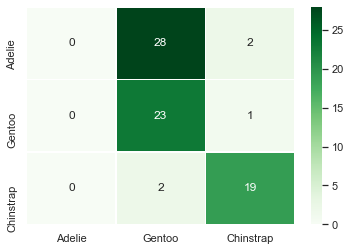

In [277]:
sns.set(color_codes=True)
sns.heatmap(SVM_confusion_matrix,cmap="Greens",annot=True,linewidth=0.5,
           xticklabels=spec_id_df["species"].values,yticklabels=spec_id_df["species"].values)

plt.show()

In [278]:
from sklearn.metrics import classification_report
print("classification report:SVC")
print(classification_report(y_test,y_pred_RM))
# very accurate model-- comaparable to the logistic regression--naive bayes

classification report:SVC
              precision    recall  f1-score   support

      Adelie       1.00      0.90      0.95        30
   Chinstrap       0.89      1.00      0.94        24
      Gentoo       1.00      1.00      1.00        21

    accuracy                           0.96        75
   macro avg       0.96      0.97      0.96        75
weighted avg       0.96      0.96      0.96        75



### The classification report of the naive bayes shows an f1 score of about 0.96 showing that the predicting efficiency is about 96% --- which is pretty good a prediction and can be compared to the logistic regression model

### Model Comparison

In [279]:
features=x_train.copy()
targets=y_train.copy()

In [280]:
models=[MultinomialNB(),SVC(),KNeighborsClassifier(),LogisticRegression(multi_class="multinomial",max_iter=10000),
        RandomForestClassifier()]

CV=5
cv_df=pd.DataFrame(index=range(CV*len(models)))
entries=[]

for model in models:
    model_name=model.__class__.__name__
    accuracies=cross_val_score(model,features,targets,scoring="accuracy",cv=CV)
    for fold_idx,accuracy in enumerate(accuracies):
        entries.append((model_name,fold_idx,accuracy))
cv_df=pd.DataFrame(entries,columns=["model_name",'fold_idx',"accuracy"])



(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

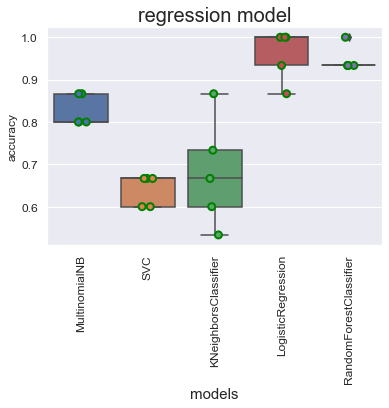

In [281]:
sns.boxplot(x="model_name",y="accuracy",data=cv_df)
sns.stripplot(x="model_name",y="accuracy",data=cv_df,size=7,jitter=True,edgecolor="green",linewidth=2)
plt.title("regression model",fontsize=20)
plt.xlabel("models",fontsize=15)

plt.xticks(fontsize=12,rotation='vertical')
plt.yticks(fontsize=12,rotation=0)

### we can see in the comparitive performance pf the diffreent regression models that the random Logistic regression and RF classifier has clearly out performed the rest of the regression models. It has a higer prediction value that is the accuracy value and it also has the least bias. Thus we can say among the general models tried out the random forest and logisic regression model performs the best

In [282]:
final_comp=cv_df.groupby("model_name").accuracy.mean().reset_index().sort_values(by="accuracy",ascending=False)

final_comp

,model_name,accuracy
1,LogisticRegression,0.960000
3,RandomForestClassifier,0.946667
2,MultinomialNB,0.826667
0,KNeighborsClassifier,0.680000
4,SVC,0.640000


### Thus we achieve the highest prediction efficiency of 96% for the logistic regression model

##  Model Hypertuning and Optimization

In [283]:
regressor=MultinomialNB()
#we have finalized the model =RandomForestRegressor as best model
#then we run this code--to optimize

grid={"alpha": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
      "fit_prior" :["true","false"]}

In [284]:
#time consuming
grid_apply=GridSearchCV(regressor,grid,scoring="accuracy",cv=5,refit=True,verbose=0)

In [285]:
grid_apply.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0],
                         'fit_prior': ['true', 'false']},
             scoring='accuracy')

In [286]:


best_perf=grid_apply.best_score_
best_model=grid_apply.best_estimator_

print ("Best Accuracy="+" "+str(best_perf))
print(" ")
print ("Best model params="+" "+str(best_model))

Best Accuracy= 0.8266666666666665
 
Best model params= MultinomialNB(alpha=0.1, fit_prior='true')


### The optimization shows that for the multinomial estimator the best accuracy that can be achieved is about 82.6% with the alpha value of 0.1